# Task 2: Data Handling 

Read the entire Lunar Prospector dataset, and demonstrate the ability to isolate and sum data based on location and altitude by producing summed spectra for the following conditions:
All data, collected at 100 km altitude (±10 km), collected within
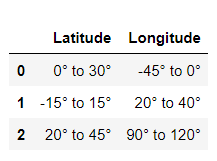

In [4]:
# Importing libraries to download required data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import struct

# Using files retrieved from Task 1 

Performing Data Manipulation for Spacecraft Altitude ~100km (+/- 10)

In [2]:
# Determining the .dat and .lbl files available locally.

import os

directory = './Task1'  # Replace with your directory path
files = os.listdir(directory)

dat_files = []
lbl_files = []
for file in files:
    if file.endswith('.dat'):
        dat_files.append(file)
    elif file.endswith('.lbl'):
        lbl_files.append(file)

In [6]:
data_0 = []
data_1 = []
data_2 = []

# Iterating through all .dat and .lbl files.
for i in dat_files:
    if i[:-4] + ".lbl" in lbl_files:
        filename = f"./Task1/{i[:-4]}.lbl"
        datafilename = f"./Task1/{i}"
    else:
        continue

    # Define the record format for the label file
    label_format = [
        ("PDS_VERSION_ID", "23s"),
        ("RECORD_TYPE", "23s"),
        ("RECORD_BYTES", "23s"),
        ("FILE_RECORDS", "23s"),
        ("^TABLE", "23s"),
        ("DATA_SET_NAME", "59s"),
        ("DATA_SET_ID", "33s"),
        ("PRODUCT_ID", "23s"),
        ("PRODUCT_TYPE", "23s"),
        ("PRODUCT_VERSION_ID", "23s"),
        ("SPACECRAFT_NAME", "23s"),
        ("INSTRUMENT_NAME", "23s"),
        ("TARGET_NAME", "23s"),
        ("START_TIME", "23s"),
        ("STOP_TIME", "23s"),
        ("SPACECRAFT_CLOCK_START_COUNT", "23s"),
        ("SPACECRAFT_CLOCK_STOP_COUNT", "23s"),
        ("PRODUCT_CREATION_TIME", "23s")
    ]

    # Define the record format for the data file
    data_format = [
        ("accepted_spectrum", "512f"),
        ("rejected_spectrum", "512f"),
        ("deadtime", "f"),
        ("overload", "f"),
        ("grs_temperature", "f"),
        ("earth_received_time", "f"),
        ("spacecraft_altitude", "f"),
        ("subspacecraft_latitude", "f"),
        ("subspacecraft_longitude", "f")
    ]

    # Open the data file for reading
    with open(filename, "r") as f:
        label = {}
        for line in f:
            # Ignoring all comments in the .lbl file.
            if line.strip() and not line.startswith("#"):
                # Splitting lines and reading values for corresponding labels
                parts = line.split("=", 1)
                if len(parts) == 2:
                    key = parts[0].strip()
                    value = parts[1].strip()
                    label[key] = value

    # Read the data file
    with open(datafilename, "rb") as f:
        for i in range(int(label["FILE_RECORDS"])):
            record = {}
            for field, format in data_format:
                bytes = f.read(struct.calcsize(format))
                value = struct.unpack(format, bytes)[0]
                # Separate condition for accepted and rejected spectrum as they 512 data items.
                if field == "accepted_spectrum" or field == "rejected_spectrum":
                    value = struct.unpack(format, bytes)
                record[field] = value
            
            if record["spacecraft_altitude"] <= 110 and record["spacecraft_altitude"] >= 90:
                if (record["subspacecraft_latitude"] <= 30 and record["subspacecraft_latitude"] >= 0) and ((record["subspacecraft_longitude"] <= 360 and record["subspacecraft_longitude"] >= 315) or (record["subspacecraft_longitude"] <= 0 and record["subspacecraft_longitude"] >= -45)):
                    data_0.append(record)
                elif (record["subspacecraft_latitude"] <= 15 and record["subspacecraft_latitude"] >= -15) and (record["subspacecraft_longitude"] <= 20 and record["subspacecraft_longitude"] >= 40):
                    data_1.append(record)            
                elif (record["subspacecraft_latitude"] <= 45 and record["subspacecraft_latitude"] >= 20) and (record["subspacecraft_longitude"] <= 120 and record["subspacecraft_longitude"] >= 90):
                    data_2.append(record)           

In [7]:
df_0 = pd.DataFrame(data_0)
print("GRS Data for Spacecraft Latitude between 0° to 15° and Spacecraft Longitude between 315° to 360°")
df_0.to_csv("./Task2/dataset_0.csv", index = False)

GRS Data for Spacecraft Latitude between 0° to 15° and Spacecraft Longitude between 315° to 360°


In [8]:
df_1 = pd.DataFrame(data_1)
print("GRS Data for Spacecraft Latitude between -15° to 15° and Spacecraft Longitude between 20° to 40°")
df_1.to_csv("./Task2/dataset_1.csv", index = False)

GRS Data for Spacecraft Latitude between -15° to 15° and Spacecraft Longitude between 20° to 40°


In [9]:
df_2 = pd.DataFrame(data_2)
print("GRS Data for Spacecraft Latitude between 20° to 45° and Spacecraft Longitude between 90° to 120°")
df_2.to_csv("./Task2/dataset_2.csv", index = False)

GRS Data for Spacecraft Latitude between 20° to 45° and Spacecraft Longitude between 90° to 120°


In [10]:
size_df_0 = len(df_0.index)
size_df_1 = len(df_1.index)
size_df_2 = len(df_2.index)
print(f"Length of Dataframe 0: {size_df_0}")
print(f"Length of Dataframe 1: {size_df_1}")
print(f"Length of Dataframe 2: {size_df_2}")

Length of Dataframe 0: 11247
Length of Dataframe 1: 0
Length of Dataframe 2: 5760


In [11]:
# Only saving first 5760 data points.

df_0 = pd.DataFrame(data_0)
df_0[:size_df_2].to_csv("./Task2/dataset_0.csv", index = False)

In [12]:
# Finding the sum of all accepted_spectrums, and inserting an additional column in the dataframe.

def find_sum_spectrum(filename):
    data = pd.read_csv(f"./Task2/{filename}.csv")
    sum_accepted_spectrum = []
    for i in range(len(data.index)):
        temp = data["accepted_spectrum"][i].lstrip("(").rstrip(")").split(",")
        temp = [float(j.strip()) for j in temp]
        sum_accepted_spectrum.append(sum(temp))
    data["sum_accepted_spectrum"] = sum_accepted_spectrum
    data.to_csv(f"./Task2/{filename}.csv", index = False)

In [13]:
find_sum_spectrum("dataset_0")
data_0 = pd.read_csv("./Task2/dataset_0.csv")
data_0

,accepted_spectrum,rejected_spectrum,deadtime,overload,grs_temperature,earth_received_time,spacecraft_altitude,subspacecraft_latitude,subspacecraft_longitude,sum_accepted_spectrum
0,"(0.059857144951820374, 4.258054256439209, 9.53...","(0.059857144951820374, 4.258054256439209, 9.53...",0.047658,24570.0,-27.952522,19.267281,100.860367,29.518463,359.603790,6997.746157
1,"(0.1345735490322113, 9.528481483459473, 10.582...","(0.1345735490322113, 9.528481483459473, 10.582...",0.047459,24631.0,-27.739590,19.267653,100.597282,27.890844,359.564972,6815.932528
2,"(0.14937223494052887, 10.571464538574219, 10.5...","(0.14937223494052887, 10.571464538574219, 10.5...",0.047082,24379.0,-27.739590,19.268023,100.334076,26.262402,359.527222,6730.970355
3,"(0.13429120182991028, 9.499791145324707, 8.448...","(0.13429120182991028, 9.499791145324707, 8.448...",0.047076,24364.0,-28.165455,19.268393,100.071236,24.633732,359.490295,6794.165134
4,"(0.05956161767244339, 4.2240118980407715, 6.32...","(0.05956161767244339, 4.2240118980407715, 6.32...",0.046727,24558.0,-28.165455,19.268763,99.808449,23.004452,359.454254,6709.872687
...,...,...,...,...,...,...,...,...,...,...
5755,"(0.16589322686195374, 3.7230684757232666, 8.23...","(0.16589322686195374, 3.7230684757232666, 8.23...",0.044877,20451.0,-29.027073,172.204544,92.097832,13.270145,323.816345,7145.078091
5756,"(0.16589200496673584, 3.6334869861602783, 5.97...","(0.16589200496673584, 3.6334869861602783, 5.97...",0.044687,20493.0,-28.810837,172.204910,92.128632,14.913285,323.788330,6985.320093
5757,"(0.2765313386917114, 5.9522929191589355, 7.226...","(0.2765313386917114, 5.9522929191589355, 7.226...",0.044737,20567.0,-28.380028,172.205276,92.170128,16.556540,323.760010,6835.062353
5758,"(0.05527983978390694, 1.4047527313232422, 7.18...","(0.05527983978390694, 1.4047527313232422, 7.18...",0.044424,20261.0,-27.952522,172.205643,92.214012,18.199430,323.731262,6825.839741


In [14]:
find_sum_spectrum("dataset_2")
data_2 = pd.read_csv("./Task2/dataset_2.csv")
data_2

,accepted_spectrum,rejected_spectrum,deadtime,overload,grs_temperature,earth_received_time,spacecraft_altitude,subspacecraft_latitude,subspacecraft_longitude,sum_accepted_spectrum
0,"(0.44003915786743164, 6.70444393157959, 10.529...","(0.44003915786743164, 6.70444393157959, 10.529...",0.042389,24390.0,-28.594601,23.739517,109.052765,20.857161,119.956268,5787.994574
1,"(0.3760599195957184, 5.522027015686035, 7.6545...","(0.3760599195957184, 5.522027015686035, 7.6545...",0.042238,24315.0,-28.165455,23.739887,109.240410,22.470190,119.941162,5849.543637
2,"(0.6761290431022644, 9.521135330200195, 6.3743...","(0.6761290431022644, 9.521135330200195, 6.3743...",0.042248,24572.0,-28.165455,23.740257,109.425026,24.083179,119.925751,5819.883112
3,"(0.6768850088119507, 9.4700345993042, 5.736340...","(0.6768850088119507, 9.4700345993042, 5.736340...",0.042291,24363.0,-28.380028,23.740627,109.597282,25.695646,119.910194,5864.650284
4,"(0.2254400998353958, 3.359696388244629, 5.3455...","(0.2254400998353958, 3.359696388244629, 5.3455...",0.041987,24526.0,-28.594601,23.740999,109.767807,27.307875,119.894241,5707.938424
...,...,...,...,...,...,...,...,...,...,...
5755,"(86.4678955078125, 7.077210903167725, 5.489294...","(86.4678955078125, 7.077210903167725, 5.489294...",0.040580,21300.0,-27.739590,353.732635,92.277367,38.359882,92.471924,5971.248087
5756,"(82.23342895507812, 4.852571964263916, 8.46331...","(82.23342895507812, 4.852571964263916, 8.46331...",0.040863,21506.0,-27.952522,353.733002,92.866493,40.002117,92.479065,5996.887050
5757,"(100.3415756225586, 8.451204299926758, 3.51515...","(100.3415756225586, 8.451204299926758, 3.51515...",0.040826,21617.0,-27.952522,353.733368,93.456970,41.643330,92.486595,6101.947843
5758,"(77.74969482421875, 9.08340072631836, 7.711343...","(77.74969482421875, 9.08340072631836, 7.711343...",0.040446,21459.0,-28.165455,353.733734,94.055443,43.283569,92.494957,5877.962728


In [15]:
# Normalising the data for plotting.
scaler = MinMaxScaler()
np_data_0 = np.array(data_0["sum_accepted_spectrum"])
np_data_0 = np_data_0.reshape(-1,1)
scaled_data_0 = scaler.fit_transform(np_data_0)

np_data_2 = np.array(data_2["sum_accepted_spectrum"])
np_data_2 = np_data_2.reshape(-1,1)
scaled_data_2 = scaler.fit_transform(np_data_2)

# Visualising the captured spectra

**NOTE**: GRS Data for Spacecraft Latitude between -15° to 15° and Spacecraft Longitude between 20° to 40° was a null dataset. Thus the corresponding plot is being ignored.

Text(0.5, 0, 'Row Number/32 second point')

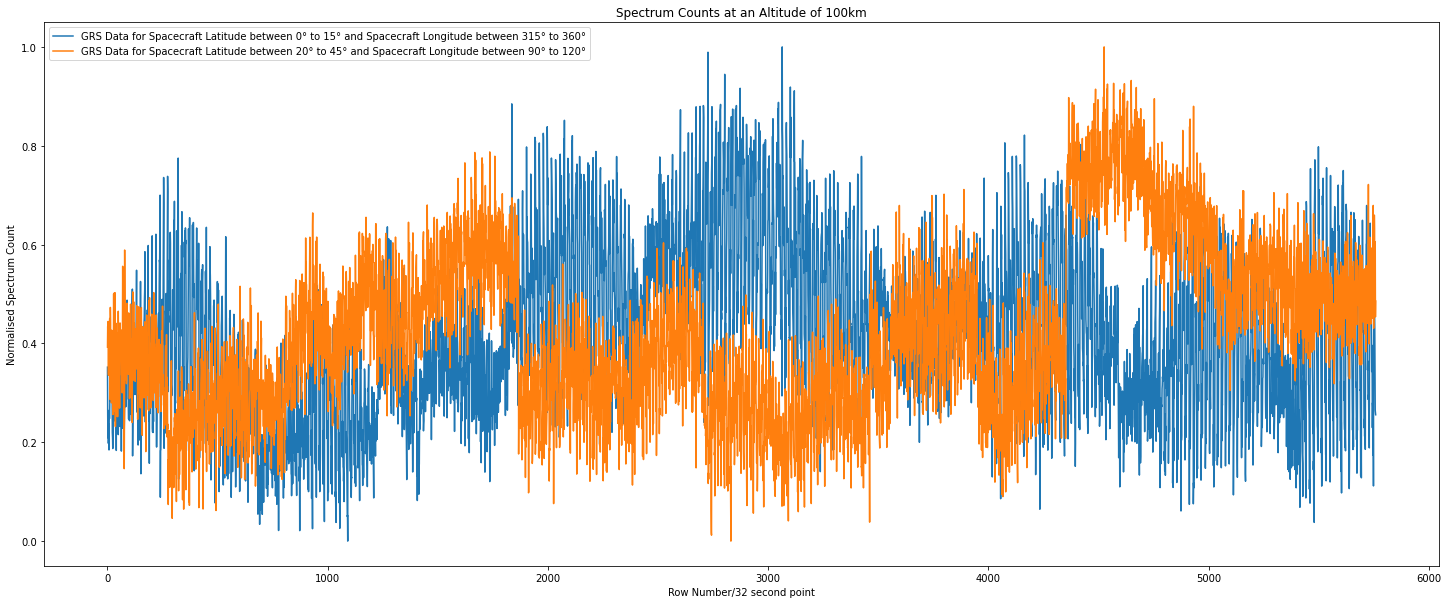

In [16]:
plt.figure(figsize = (25, 10))
plt.plot(scaled_data_0, label = "GRS Data for Spacecraft Latitude between 0° to 15° and Spacecraft Longitude between 315° to 360°")
plt.plot(scaled_data_2, label = "GRS Data for Spacecraft Latitude between 20° to 45° and Spacecraft Longitude between 90° to 120°" )
plt.legend(loc="upper left")
plt.title("Spectrum Counts at an Altitude of 100km")
plt.ylabel("Normalised Spectrum Count")
plt.xlabel("Row Number/32 second point")

# Performing Data Manipulation for Spacecraft Altitude ~30km (+/- 3) 


In [17]:
data_0 = []
data_1 = []
data_2 = []

# Iterating through all .dat and .lbl files.
for i in dat_files:
    if i[:-4] + ".lbl" in lbl_files:
        filename = f"./Task1/{i[:-4]}.lbl"
        datafilename = f"./Task1/{i}"
    else:
        continue

    # Define the record format for the label file
    label_format = [
        ("PDS_VERSION_ID", "23s"),
        ("RECORD_TYPE", "23s"),
        ("RECORD_BYTES", "23s"),
        ("FILE_RECORDS", "23s"),
        ("^TABLE", "23s"),
        ("DATA_SET_NAME", "59s"),
        ("DATA_SET_ID", "33s"),
        ("PRODUCT_ID", "23s"),
        ("PRODUCT_TYPE", "23s"),
        ("PRODUCT_VERSION_ID", "23s"),
        ("SPACECRAFT_NAME", "23s"),
        ("INSTRUMENT_NAME", "23s"),
        ("TARGET_NAME", "23s"),
        ("START_TIME", "23s"),
        ("STOP_TIME", "23s"),
        ("SPACECRAFT_CLOCK_START_COUNT", "23s"),
        ("SPACECRAFT_CLOCK_STOP_COUNT", "23s"),
        ("PRODUCT_CREATION_TIME", "23s")
    ]

    # Define the record format for the data file
    data_format = [
        ("accepted_spectrum", "512f"),
        ("rejected_spectrum", "512f"),
        ("deadtime", "f"),
        ("overload", "f"),
        ("grs_temperature", "f"),
        ("earth_received_time", "f"),
        ("spacecraft_altitude", "f"),
        ("subspacecraft_latitude", "f"),
        ("subspacecraft_longitude", "f")
    ]

    # Open the data file for reading
    with open(filename, "r") as f:
        label = {}
        for line in f:
            # Ignoring all comments in the .lbl file.
            if line.strip() and not line.startswith("#"):
                # Splitting lines and reading values for corresponding labels
                parts = line.split("=", 1)
                if len(parts) == 2:
                    key = parts[0].strip()
                    value = parts[1].strip()
                    label[key] = value

    # Read the data file
    with open(datafilename, "rb") as f:
        for i in range(int(label["FILE_RECORDS"])):
            record = {}
            for field, format in data_format:
                bytes = f.read(struct.calcsize(format))
                value = struct.unpack(format, bytes)[0]
                # Separate condition for accepted and rejected spectrum as they 512 data items.
                if field == "accepted_spectrum" or field == "rejected_spectrum":
                    value = struct.unpack(format, bytes)
                record[field] = value
            
            if record["spacecraft_altitude"] <= 33 and record["spacecraft_altitude"] >= 27:
                if (record["subspacecraft_latitude"] <= 30 and record["subspacecraft_latitude"] >= 0) and ((record["subspacecraft_longitude"] <= 360 and record["subspacecraft_longitude"] >= 315) or (record["subspacecraft_longitude"] <= 0 and record["subspacecraft_longitude"] >= -45)):
                    data_0.append(record)
                elif (record["subspacecraft_latitude"] <= 15 and record["subspacecraft_latitude"] >= -15) and (record["subspacecraft_longitude"] <= 20 and record["subspacecraft_longitude"] >= 40):
                    data_1.append(record)            
                elif (record["subspacecraft_latitude"] <= 45 and record["subspacecraft_latitude"] >= 20) and (record["subspacecraft_longitude"] <= 120 and record["subspacecraft_longitude"] >= 90):
                    data_2.append(record)           

In [18]:
df_0 = pd.DataFrame(data_0)
print("GRS Data for Spacecraft Latitude between 0° to 15° and Spacecraft Longitude between 315° to 360°")
df_0.to_csv("./Task2/dataset_30_0.csv", index = False)

GRS Data for Spacecraft Latitude between 0° to 15° and Spacecraft Longitude between 315° to 360°


In [19]:
df_1 = pd.DataFrame(data_1)
print("GRS Data for Spacecraft Latitude between -15° to 15° and Spacecraft Longitude between 20° to 40°")
df_1.to_csv("./Task2/dataset_30_1.csv", index = False)

GRS Data for Spacecraft Latitude between -15° to 15° and Spacecraft Longitude between 20° to 40°


In [20]:
df_2 = pd.DataFrame(data_2)
print("GRS Data for Spacecraft Latitude between 20° to 45° and Spacecraft Longitude between 90° to 120°")
df_2.to_csv("./Task2/dataset_30_2.csv", index = False)

GRS Data for Spacecraft Latitude between 20° to 45° and Spacecraft Longitude between 90° to 120°


In [21]:
size_df_0 = len(df_0.index)
size_df_1 = len(df_1.index)
size_df_2 = len(df_2.index)
print(f"Length of Dataframe 0: {size_df_0}")
print(f"Length of Dataframe 1: {size_df_1}")
print(f"Length of Dataframe 2: {size_df_2}")

Length of Dataframe 0: 3814
Length of Dataframe 1: 0
Length of Dataframe 2: 353


In [22]:
# Only saving first 353 data points.

df_0 = pd.DataFrame(data_0)
df_0[:size_df_2].to_csv("./Task2/dataset_30_0.csv", index = False)

In [23]:
# Finding the sum of all accepted_spectrums, and inserting an additional column in the dataframe.

def find_sum_spectrum(filename):
    data = pd.read_csv(f"./Task2/{filename}.csv")
    sum_accepted_spectrum = []
    for i in range(len(data.index)):
        temp = data["accepted_spectrum"][i].lstrip("(").rstrip(")").split(",")
        temp = [float(j.strip()) for j in temp]
        sum_accepted_spectrum.append(sum(temp))
    data["sum_accepted_spectrum"] = sum_accepted_spectrum
    data.to_csv(f"./Task2/{filename}.csv", index = False)

In [24]:
find_sum_spectrum("dataset_30_0")
data_0 = pd.read_csv("./Task2/dataset_30_0.csv")
data_0

,accepted_spectrum,rejected_spectrum,deadtime,overload,grs_temperature,earth_received_time,spacecraft_altitude,subspacecraft_latitude,subspacecraft_longitude,sum_accepted_spectrum
0,"(80.27505493164062, 7.864253520965576, 5.85379...","(80.27505493164062, 7.864253520965576, 5.85379...",0.048514,20078.0,-27.739590,401.769440,29.336782,29.389296,359.510468,6604.311650
1,"(80.20308685302734, 12.072466850280762, 4.8685...","(80.20308685302734, 12.072466850280762, 4.8685...",0.047990,20204.0,-28.165455,401.769836,29.239254,27.661058,359.478790,6539.768270
2,"(98.31763458251953, 9.062939643859863, 5.85398...","(98.31763458251953, 9.062939643859863, 5.85398...",0.049535,20347.0,-28.165455,401.770203,29.141975,25.932739,359.448120,6978.715060
3,"(94.47620391845703, 8.801506042480469, 4.27207...","(94.47620391845703, 8.801506042480469, 4.27207...",0.048282,20216.0,-28.165455,401.770569,29.046320,24.203926,359.418091,6587.290023
4,"(76.4569091796875, 7.29782772064209, 4.2856612...","(76.4569091796875, 7.29782772064209, 4.2856612...",0.047233,20041.0,-28.165455,401.770935,28.951334,22.475338,359.388824,6264.378069
...,...,...,...,...,...,...,...,...,...,...
348,"(68.43344116210938, 11.797538757324219, 7.9513...","(68.43344116210938, 11.797538757324219, 7.9513...",0.049052,20349.0,-27.739590,404.396515,27.952957,19.939806,324.513275,6488.590826
349,"(57.69916534423828, 6.1498799324035645, 7.2323...","(57.69916534423828, 6.1498799324035645, 7.2323...",0.049112,20403.0,-27.739590,404.396881,27.614576,18.208750,324.482605,6394.885854
350,"(82.50407409667969, 8.552437782287598, 8.10984...","(82.50407409667969, 8.552437782287598, 8.10984...",0.049300,20242.0,-27.739590,404.397247,27.276386,16.476913,324.452515,6430.634182
351,"(90.73033142089844, 12.681635856628418, 5.6068...","(90.73033142089844, 12.681635856628418, 5.6068...",0.048471,20529.0,-27.316959,404.471680,30.038397,29.326017,323.686249,6506.773230


In [25]:
find_sum_spectrum("dataset_30_2")
data_2 = pd.read_csv("./Task2/dataset_30_2.csv")
data_2

,accepted_spectrum,rejected_spectrum,deadtime,overload,grs_temperature,earth_received_time,spacecraft_altitude,subspacecraft_latitude,subspacecraft_longitude,sum_accepted_spectrum
0,"(0.4210492968559265, 5.647581100463867, 4.7276...","(0.4210492968559265, 5.647581100463867, 4.7276...",0.042097,19866.0,-28.165455,366.613770,32.960361,44.201973,101.698532,5461.608390
1,"(0.20875993371009827, 2.944854497909546, 7.518...","(0.20875993371009827, 2.944854497909546, 7.518...",0.042291,19785.0,-27.739590,366.691528,32.819054,44.833378,100.658401,5395.176164
2,"(0.2790878713130951, 3.7693264484405518, 3.769...","(0.2790878713130951, 3.7693264484405518, 3.769...",0.042317,19755.0,-27.739590,366.691925,32.903481,43.107254,100.668503,5340.457336
3,"(0.34918999671936035, 4.665788173675537, 2.829...","(0.34918999671936035, 4.665788173675537, 2.829...",0.042519,19881.0,-28.165455,366.692291,32.993580,41.380756,100.677864,5319.826000
4,"(0.0717214047908783, 1.0283143520355225, 3.762...","(0.0717214047908783, 1.0283143520355225, 3.762...",0.042042,19809.0,-28.594601,366.925629,32.964504,43.351517,97.520279,5304.327811
...,...,...,...,...,...,...,...,...,...,...
348,"(60.52996063232422, 7.233383655548096, 2.99431...","(60.52996063232422, 7.233383655548096, 2.99431...",0.042886,19613.0,-27.739590,572.174927,28.133152,44.975033,93.571426,5457.590292
349,"(57.47968673706055, 6.234445095062256, 3.88042...","(57.47968673706055, 6.234445095062256, 3.88042...",0.043367,19441.0,-27.739590,572.251587,27.266169,42.263653,92.507042,5731.558959
350,"(60.249290466308594, 7.284313678741455, 7.6448...","(60.249290466308594, 7.284313678741455, 7.6448...",0.043208,19463.0,-27.739590,572.251953,27.648499,43.995953,92.527634,5595.000012
351,"(93.34359741210938, 7.129873752593994, 6.59584...","(93.34359741210938, 7.129873752593994, 6.59584...",0.043903,19715.0,-27.316959,572.329041,27.058599,43.025517,91.485901,5680.241297


In [26]:
# Normalising the data for plotting.
scaler = MinMaxScaler()
np_data_0 = np.array(data_0["sum_accepted_spectrum"])
np_data_0 = np_data_0.reshape(-1,1)
scaled_data_0 = scaler.fit_transform(np_data_0)

np_data_2 = np.array(data_2["sum_accepted_spectrum"])
np_data_2 = np_data_2.reshape(-1,1)
scaled_data_2 = scaler.fit_transform(np_data_2)

Text(0.5, 0, 'Row Number/32 second point')

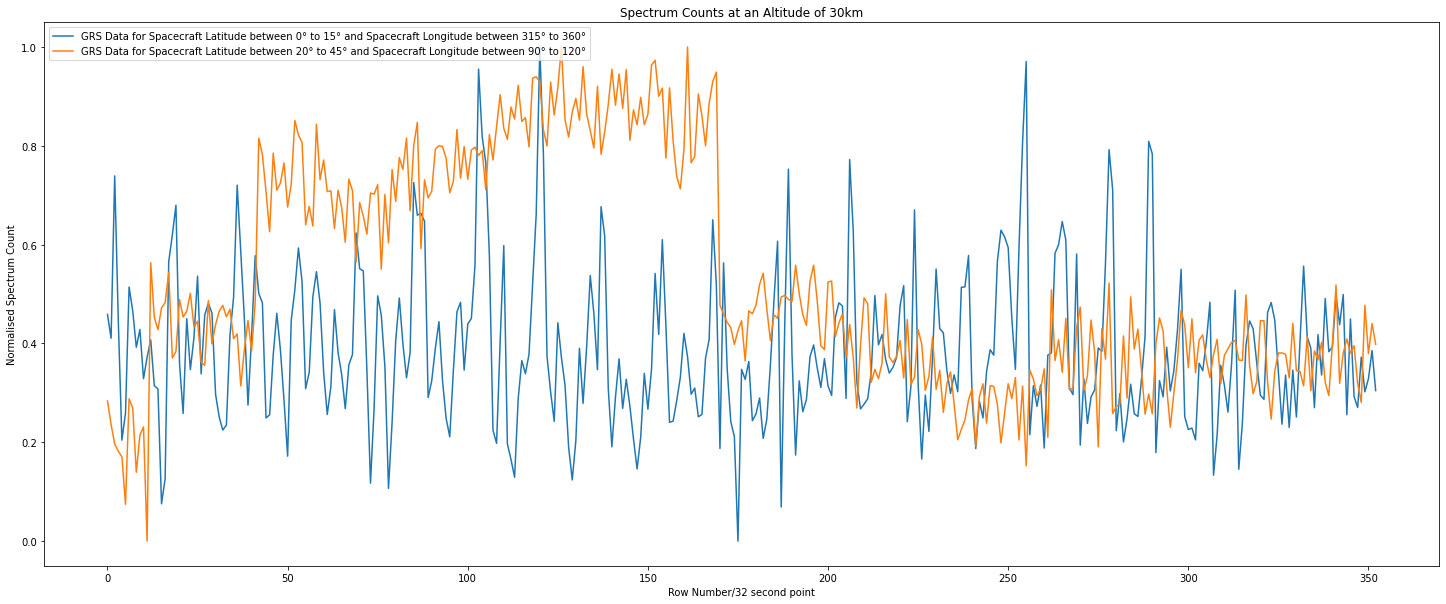

In [27]:
plt.figure(figsize = (25, 10))
plt.plot(scaled_data_0, label = "GRS Data for Spacecraft Latitude between 0° to 15° and Spacecraft Longitude between 315° to 360°")
plt.plot(scaled_data_2, label = "GRS Data for Spacecraft Latitude between 20° to 45° and Spacecraft Longitude between 90° to 120°" )
plt.legend(loc="upper left")
plt.title("Spectrum Counts at an Altitude of 30km")
plt.ylabel("Normalised Spectrum Count")
plt.xlabel("Row Number/32 second point")

# Task Complete

The corresponding data manipulation has been performed and the graphs have been plotted for GRS data collected at an altitude of 100km and 30km.

*Kindly note that certain outputs while fetching the data have been cleared. Only necessary outputs have been displayed*